# Hello BigQuery

[Google BigQuery](https://cloud.google.com/bigquery) is a fast, economical, and fully managed data warehouse for large-scale data analytics. You can use BigQuery and SQL to focus on transforming and gaining insights into your data. Datalab supports the [Standard SQL BigQuery](https://cloud.google.com/bigquery/docs/reference/standard-sql/).

This query works against the `natality` table from `samples` dataset of the `bigquery-public-data` project. It will give the top 10 rows of this table:

In [1]:
%%bq query
SELECT * FROM `bigquery-public-data.samples.natality` LIMIT 10

source_year,year,month,day,wday,state,is_male,child_race,weight_pounds,plurality,apgar_1min,apgar_5min,mother_residence_state,mother_race,mother_age,gestation_weeks,lmp,mother_married,mother_birth_state,cigarette_use,cigarettes_per_day,alcohol_use,drinks_per_week,weight_gain_pounds,born_alive_alive,born_alive_dead,born_dead,ever_born,father_race,father_age,record_weight
1970,1970,9,4,,HI,True,7,7.62578964258,,,,HI,1,37,38,12101999,True,HI,,,,,,7,0,0,8,7,46,2
1971,1971,6,2,,HI,False,6,7.43839671988,1,,,HI,6,43,38,09041910,True,HI,,,,,,11,0,0,12,6,47,2
1972,1972,11,27,,HI,False,7,8.437090766739999,1,,,HI,7,46,41,02071922,True,,,,,,,12,0,0,13,7,48,2
1972,1972,11,10,,HI,True,7,7.3744626639,1,,,HI,7,38,99,02991922,True,,,,,,,6,0,3,10,7,34,2
1973,1973,12,26,,HI,False,7,5.8135898489399995,1,,,HI,7,42,99,04991933,True,Foreign,,,,,,8,0,1,10,7,49,2
1975,1975,3,6,,HI,False,6,8.50102482272,1,,,HI,1,29,44,05021954,True,HI,,,,,,6,0,1,8,6,33,2
1976,1976,6,10,,HI,True,6,4.7509617461,1,,,HI,6,27,99,10991965,True,HI,,,,,,6,0,1,8,6,36,2
1978,1978,12,22,,HI,False,7,7.06140625186,1,9,10,HI,7,36,38,03261988,True,Foreign,,,,,,8,0,0,9,7,47,2
1983,1983,3,28,,HI,True,7,7.5618555866,1,8,9,HI,7,40,36,07181932,True,Foreign,,,,,,9,0,0,10,7,43,1
1985,1985,7,13,,HI,True,7,7.9035720927,1,8,9,HI,7,34,99,9999195-,True,Foreign,,,,,,7,0,0,8,7,33,1


The following query will give the total births by year:

In [2]:
%%bq query
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

year,birth_count
2008,4255156
2007,4324008
2006,4273225
2005,4145619
2004,4118907
2003,4096092
2002,4027376
2001,4031531
2000,4063823
1999,3963465


# Interactive Charts with Google Charting APIs

Google Cloud Datalab provides functionality to easily use the Google Charting API to produce interactive, JavaScript and SVG-based charts from your data, whether your data was loaded from BigQuery, CSV files, or another source loaded into a vanilla Python list.

These charts can be produced through the `%%chart` command.

## The Chart Command

In [3]:
%%chart --help

usage: %%chart [-h]
               {annotation,area,bars,bubbles,calendar,candlestick,columns,combo,gauge,geo,heatmap,histogram,line,map,org,paged_table,pie,sankey,scatter,stepped_area,table,timeline,treemap}
               ...

Generate an inline chart using Google Charts using the data in a Table, Query,
dataframe, or list. Numerous types of charts are supported. Options for the
charts can be specified in the cell body using YAML or JSON.

positional arguments:
  {annotation,area,bars,bubbles,calendar,candlestick,columns,combo,gauge,geo,heatmap,histogram,line,map,org,paged_table,pie,sankey,scatter,stepped_area,table,timeline,treemap}
                        commands
    annotation          Generate a annotation chart.
    area                Generate a area chart.
    bars                Generate a bars chart.
    bubbles             Generate a bubbles chart.
    calendar            Generate a calendar chart.
    candlestick         Generate a candlestick chart.
    columns          

As you can see, a variety of chart types are supported.

In [4]:
%%chart line --help

usage: %%chart line [-h] [-f FIELDS] -d DATA

Generate a line chart.

optional arguments:
  -h, --help            show this help message and exit
  -f FIELDS, --fields FIELDS
                        The field(s) to include in the chart
  -d DATA, --data DATA  The name of the variable referencing the Table or
                        Query to chart
None


The data to be charted is passed in as an argument.

Columns in data must be in a specific order according to the chart type. The --field argument, which takes a comma-separated list of field names, allows specifying the ordered set of columns to chart.

The body of the cell can include additional chart-specific options to pass to the chart.

The next cell block runs the same query, but this time saves the results to a new variable `total_births`, which is given as an argument to the `%%bq query`. The results can then be used for further analysis and visualization.

In [5]:
%%bq query -n total_births
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

Note that this query wasn't run and nothing will be outputted. We can separately run this query and get the restuls by:

`%bq execute -q total_births`

# Line Chart

We can pass `total_births` as the DATA argument to `%%chart line`:

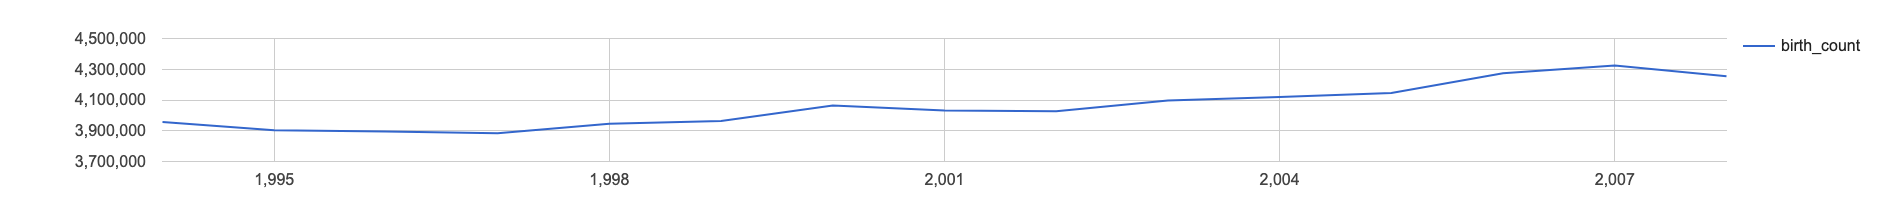

In [6]:
%%chart line --data total_births

Bar charts and column charts are similar to line charts.

In [7]:
%%chart bars --help

usage: %%chart bars [-h] [-f FIELDS] -d DATA

Generate a bars chart.

optional arguments:
  -h, --help            show this help message and exit
  -f FIELDS, --fields FIELDS
                        The field(s) to include in the chart
  -d DATA, --data DATA  The name of the variable referencing the Table or
                        Query to chart
None


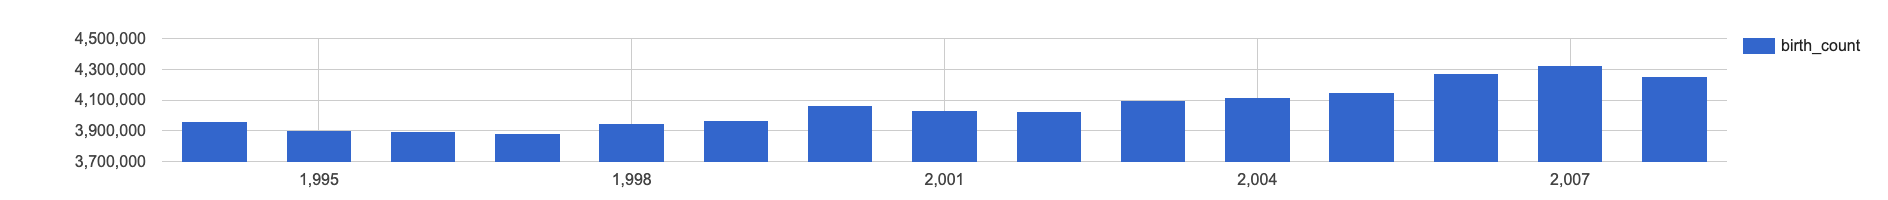

In [8]:
%%chart columns --data total_births

# Scatter Chart

In [9]:
%%bq query -n births
SELECT gestation_weeks AS weeks, weight_pounds AS weight
FROM `publicdata.samples.natality`
WHERE gestation_weeks < 99
LIMIT 1000

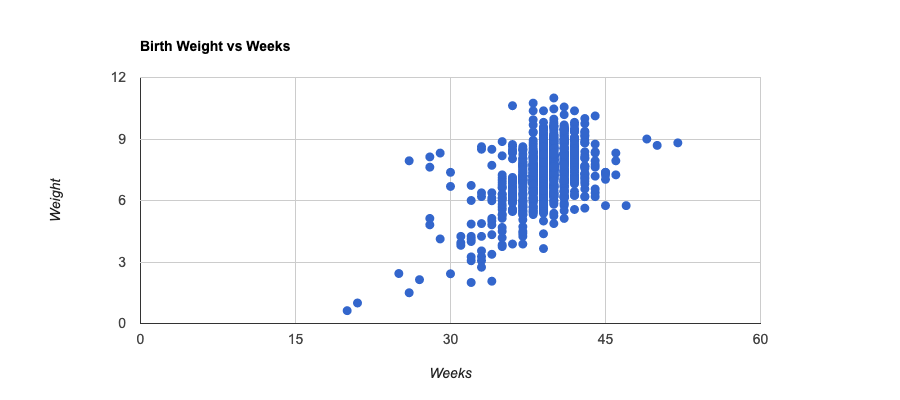

In [10]:
%%chart scatter --data births
title: Birth Weight vs Weeks
height: 400
width: 900
hAxis:
  title: Weeks
vAxis:
  title: Weight
legend: none

# Pie Chart

Now we will query the table we uploaded in the previous class: `customer_churn`

In [11]:
%%bq query
SELECT * FROM `ba-770.examples.customer_churn`
LIMIT 5

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
9732-OUYRN,Female,0,True,False,49,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,False,Credit card (automatic),19.0,918.7,False
0661-KQHNK,Female,0,True,True,6,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,False,Credit card (automatic),19.0,105.5,False
4709-LKHYG,Female,0,True,True,29,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,False,Electronic check,20.0,540.05,False
9824-QCJPK,Male,0,True,False,36,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.0,666.75,False
4716-MRVEN,Female,0,False,False,29,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.0,599.3,False


In [12]:
%%bq query -n customer_churn
SELECT PaymentMethod , COUNT(PaymentMethod) as count
FROM `ba-770.examples.customer_churn`
GROUP BY PaymentMethod
ORDER BY count DESC
LIMIT 10

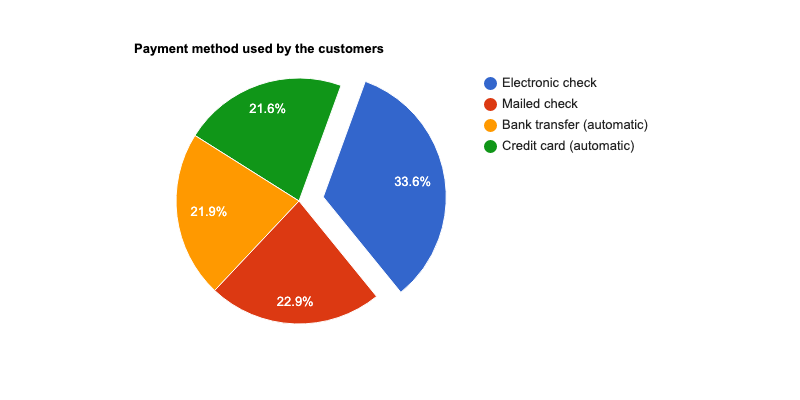

In [13]:
%%chart pie --fields PaymentMethod,count --data customer_churn
title: Payment method used by the customers
height: 400
width: 800
pieStartAngle: 20
slices:
  0:
    offset: .2

# TimeSeries Chart

In [14]:
%%bq query -n weather
SELECT max_temperature AS temperature,
       SAFE_CAST(CONCAT(SAFE_CAST(year AS STRING), '-', SAFE_CAST(month AS STRING), '-', SAFE_CAST(day AS STRING)) AS TIMESTAMP) AS timestamp
FROM `publicdata.samples.gsod`
WHERE station_number = 727930 AND year >= 2000
ORDER BY year DESC, month DESC, day DESC

In [15]:
%%chart annotation --fields timestamp,temperature --data weather

---

If you're a BigQuery user, you've likely used the BigQuery console to issue queries and display results. Datalab also makes it simple to issue a SQL query and see the results.

As the these sample and tutorial notebooks illustrate, Datalab goes further, allowing you to issue multiple queries, visualize the data beyond tables, and ultimately build sophisticated pipelines to use your data productively, to the fullest extent.

One additional link - the [BigQuery SQL reference](https://cloud.google.com/bigquery/docs/reference/standard-sql/). This reference is also accessible at any time from the Help menu on the toolbar on the top of the page.